# Website Checker

Checking, is the Website is **Phishing Website** or **Not**

## Importing Libraries

In [1]:
using DataFrames;
using CSV;
using Plots;

using DataStructures;

## Importing Dataset

In [2]:
dataf = DataFrame(CSV.File("data.csv"));
first(dataf,10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting
,Int64,Int64,Int64,Int64,Int64
1,1,1,0,0,1
2,0,1,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,1,0,0
6,1,0,1,0,1
7,0,-1,0,0,0
8,0,-1,0,0,0
9,0,0,0,0,0


## 1. Exploratory Data Analysis (EDA)

In [3]:
size(dataf)# read size

(2456, 31)

In [4]:
# propertynames(dataf) # get type of the symbol
columns  = names(dataf)
print(columns)

["having_IP_Address", "URL_Length", "Shortining_Service", "having_At_Symbol", "double_slash_redirecting", "Prefix_Suffix", "having_Sub_Domain", "SSLfinal_State", "Domain_registeration_length", "Favicon", "port", "HTTPS_token", "Request_URL", "URL_of_Anchor", "Links_in_tags", "SFH", "Submitting_to_email", "Abnormal_URL", "Redirect", "on_mouseover", "RightClick", "popUpWidnow", "Iframe", "age_of_domain", "DNSRecord", "web_traffic", "Page_Rank", "Google_Index", "Links_pointing_to_page", "Statistical_report", "Result"]

### Checking Missing Value - Columnwise
Here, our Dataset **does not have any missing value**

In [5]:
ismissing(dataf) 
# Whether dataf missing values

false

### Plotting Histogram For Checking Data Distribution

Here, According to the Histogram, all the columns are **discreate variable columns**.

In [6]:
cols = propertynames(dataf);

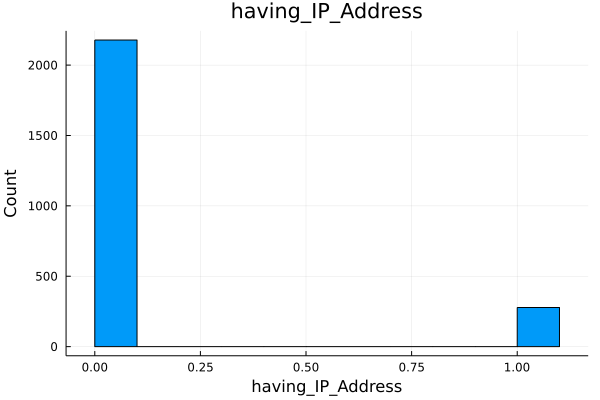

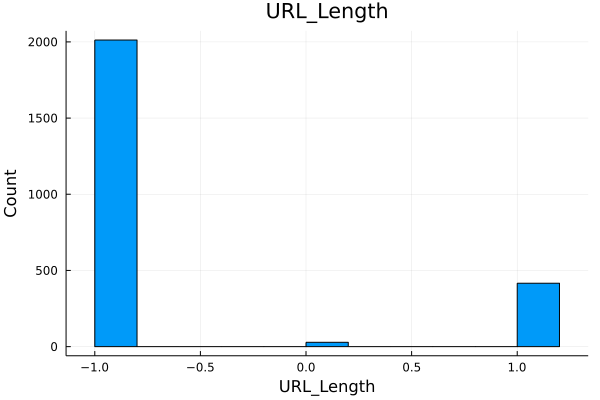

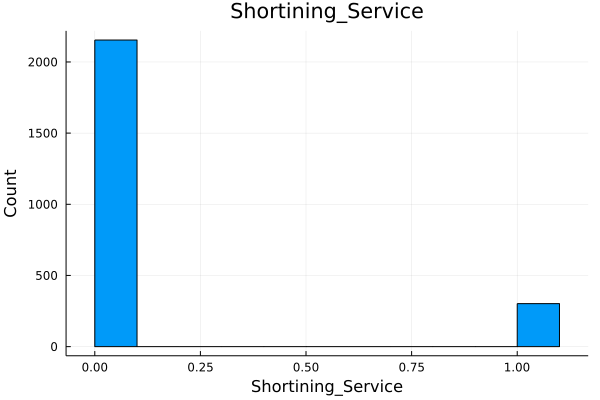

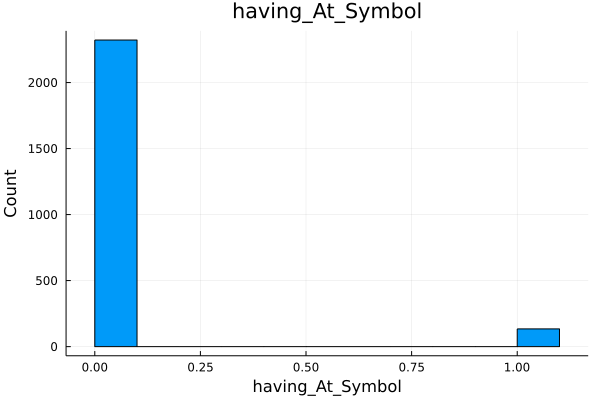

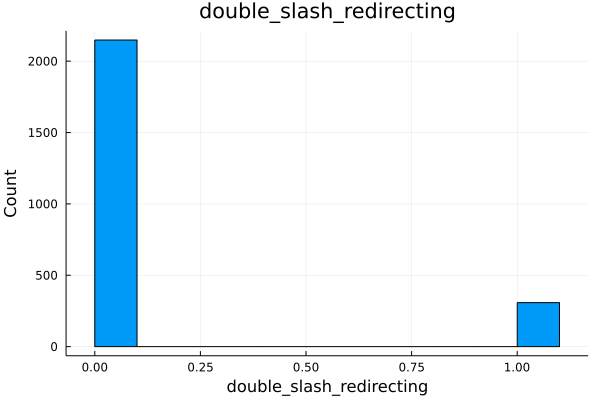

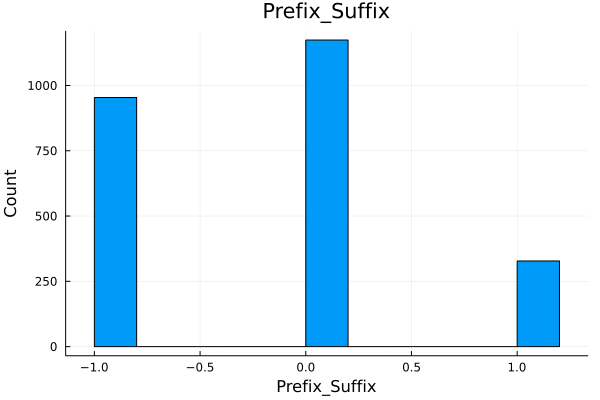

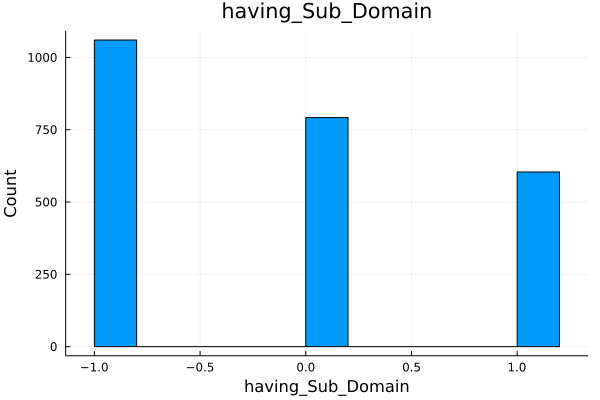

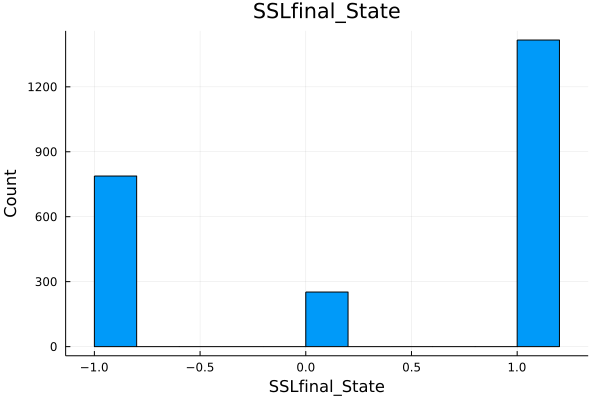

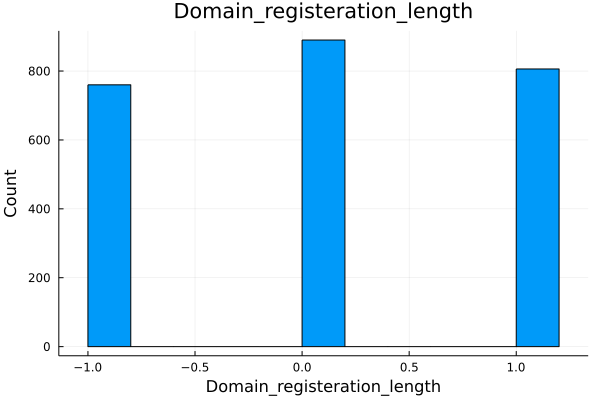

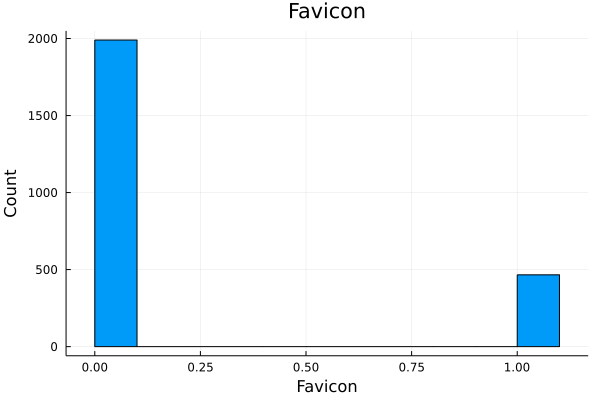

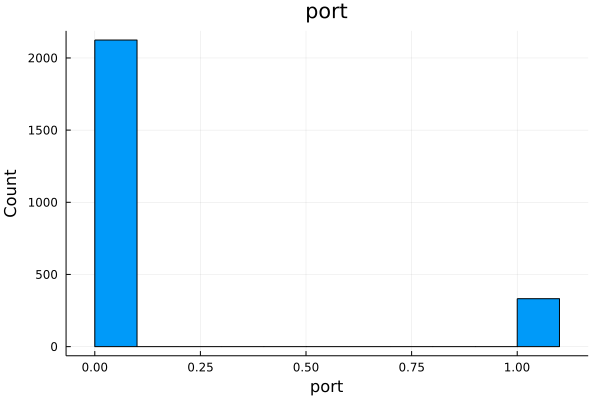

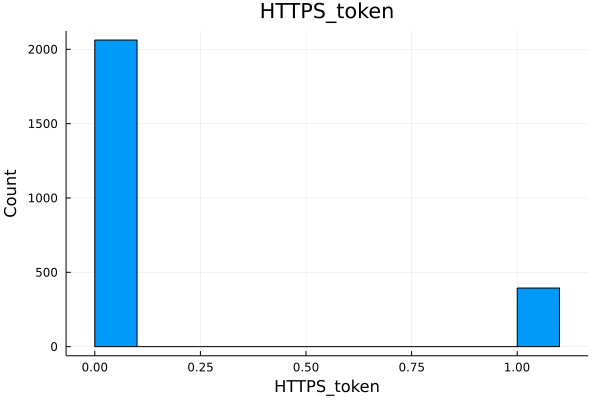

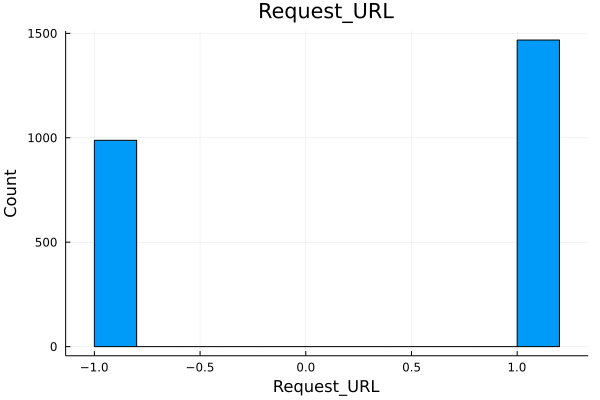

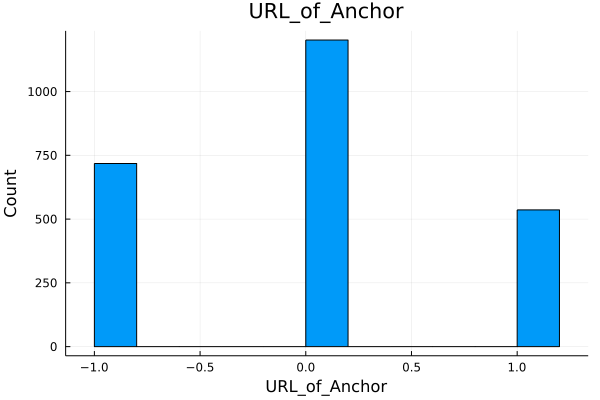

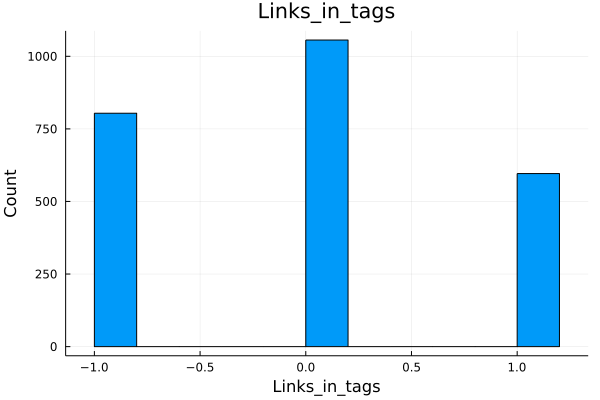

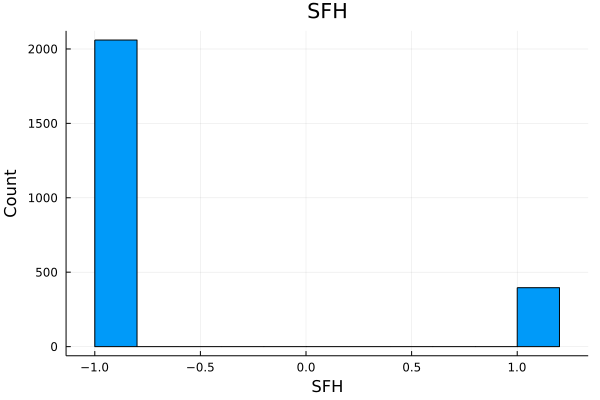

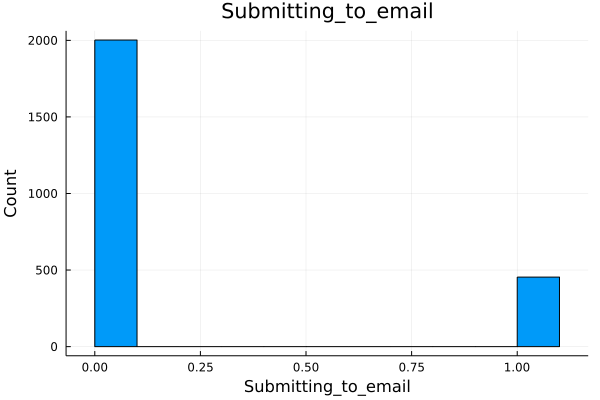

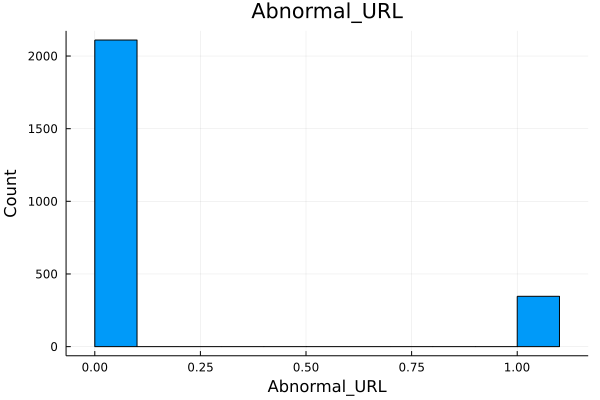

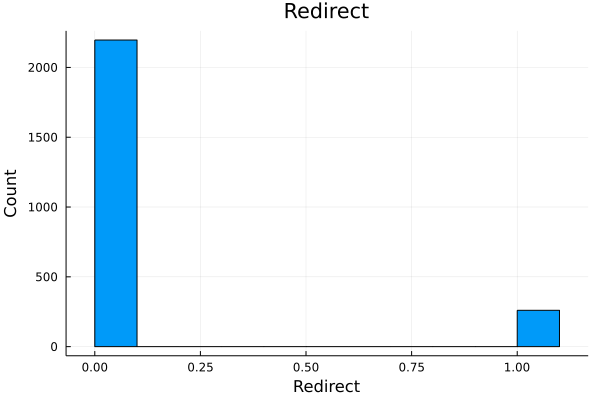

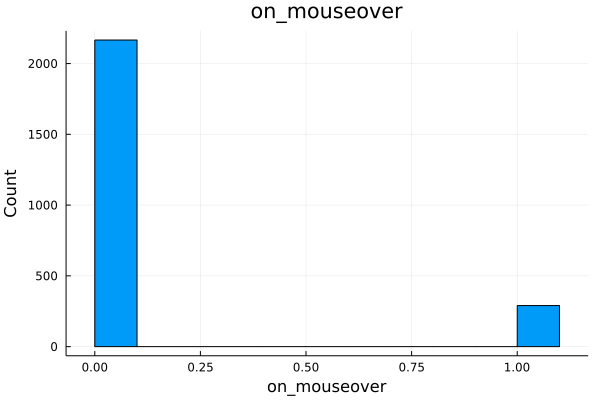

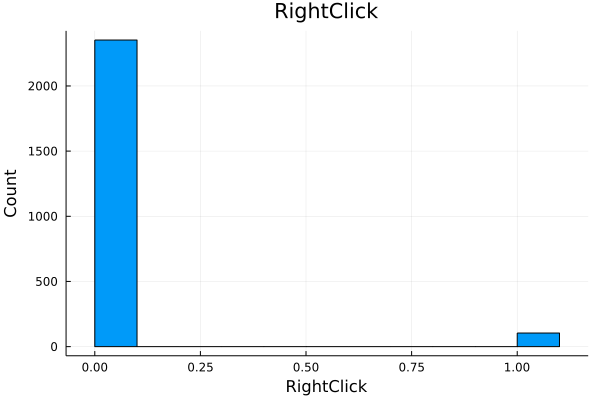

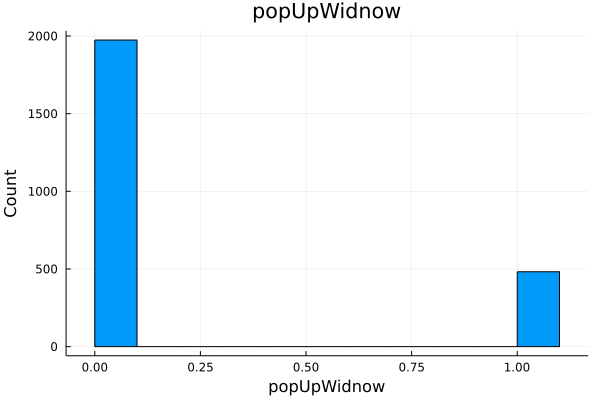

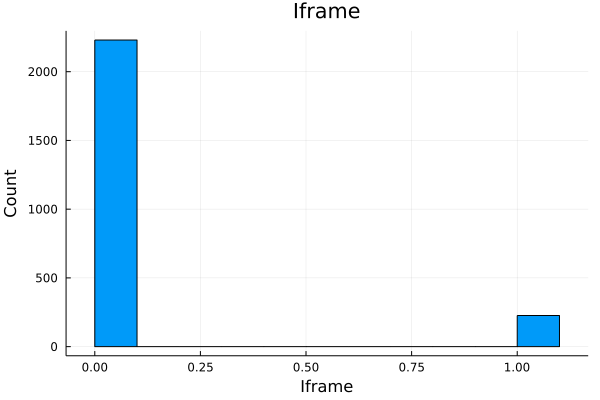

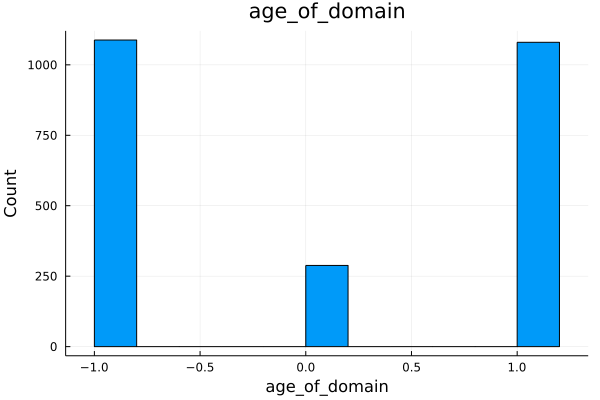

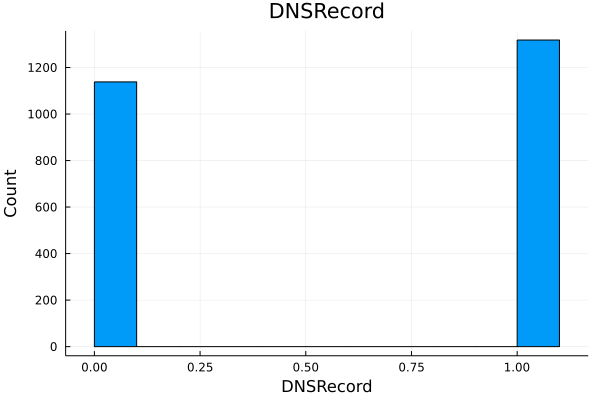

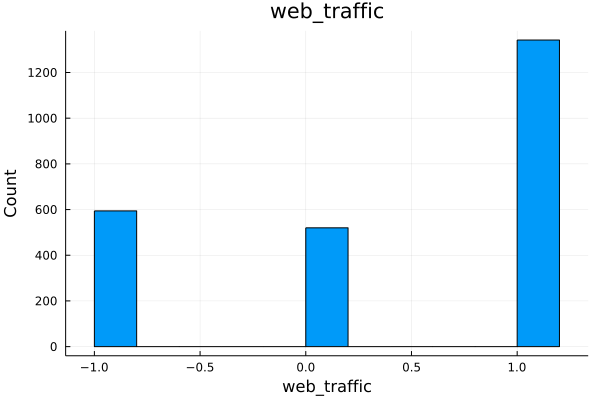

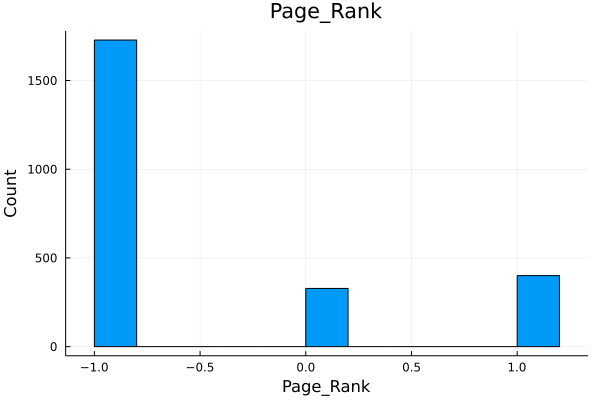

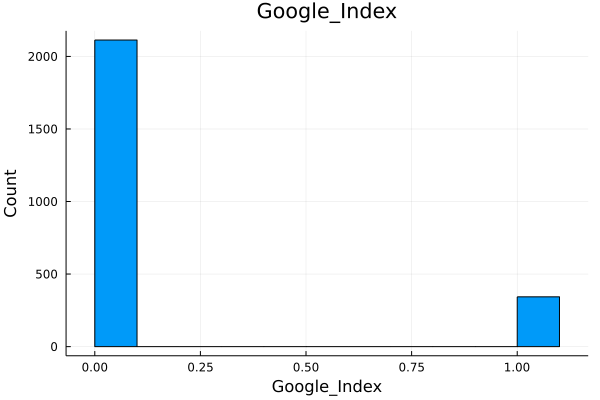

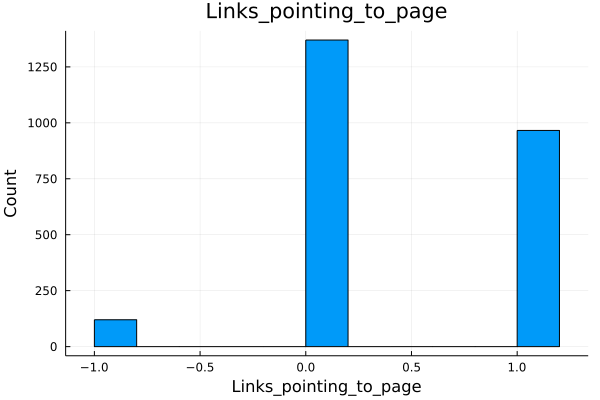

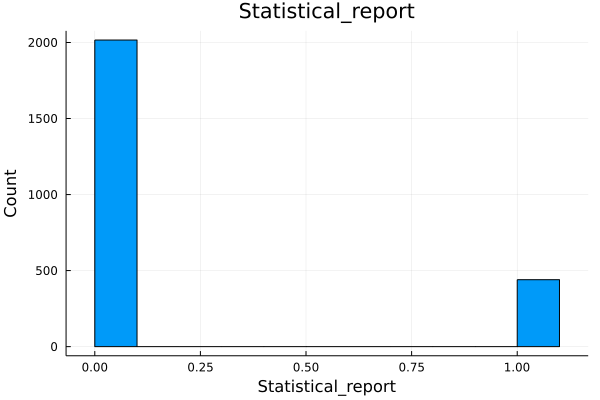

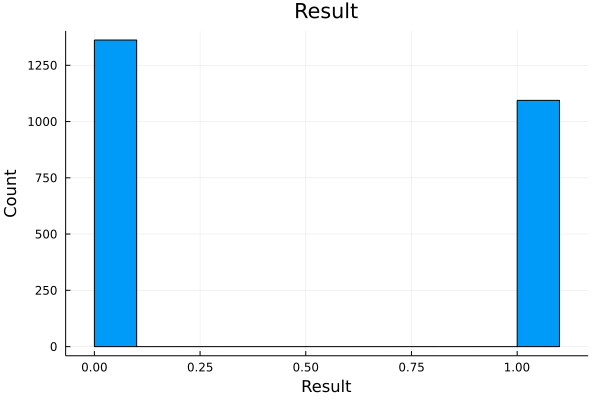

In [7]:
#plot(Plots.histogram.(eachcol(dataf))...)
#Plotting Histogram For Checking Data Distribution
for col in cols
    display(plot(
    Plots.histogram(dataf[!,col], bins = 10, title = col,legend=:none),
    xlabel = col, ylabel = "Count"  ))
end


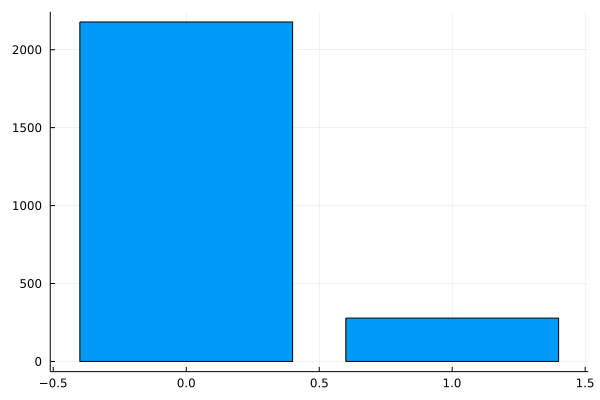

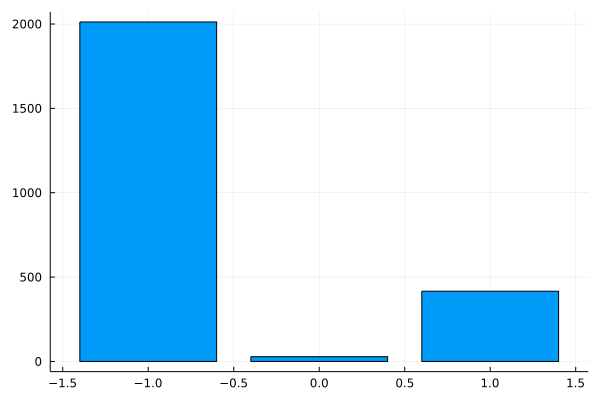

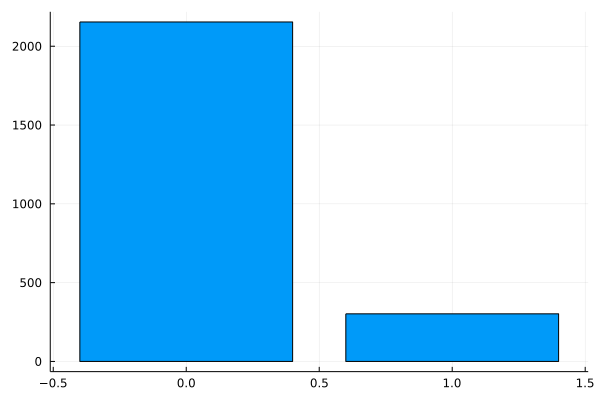

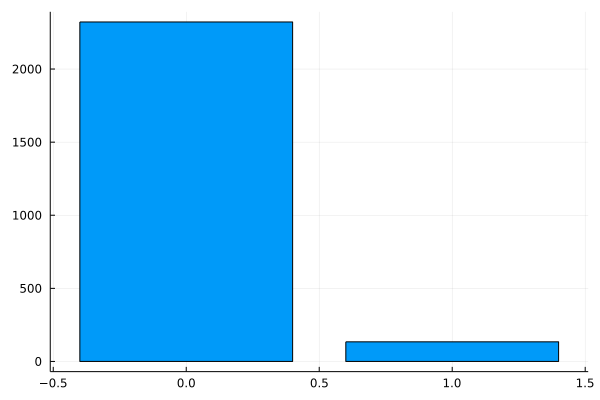

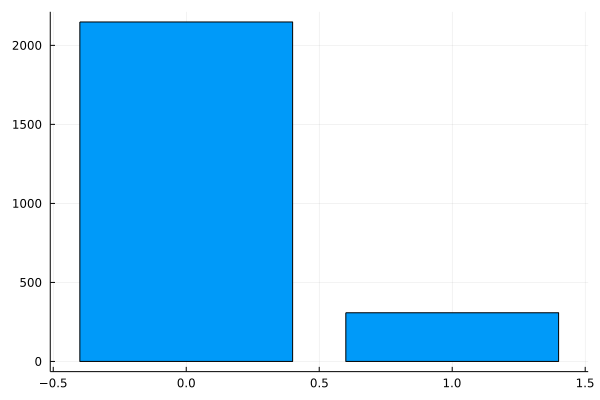

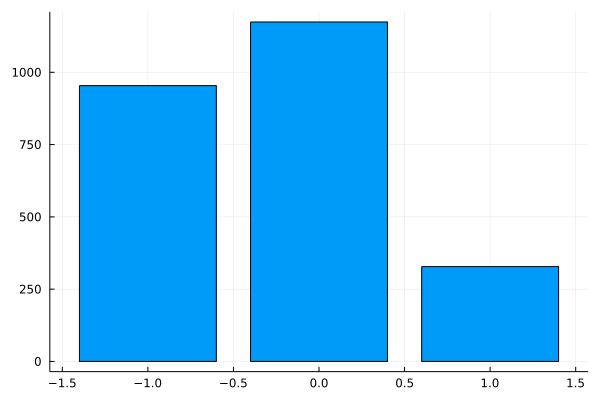

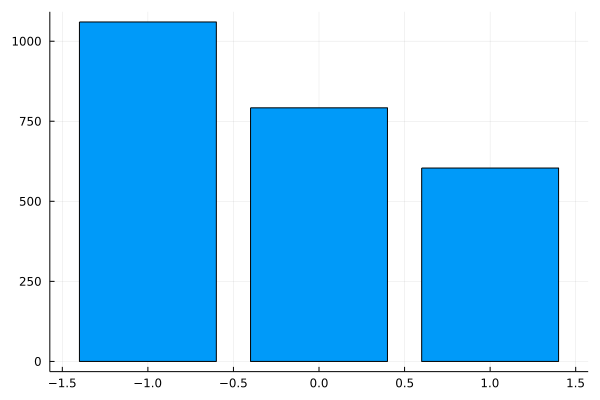

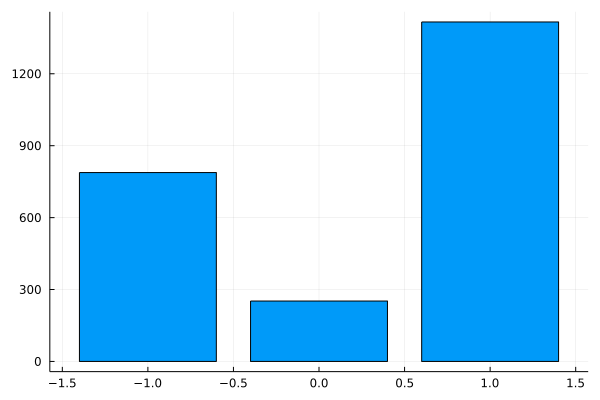

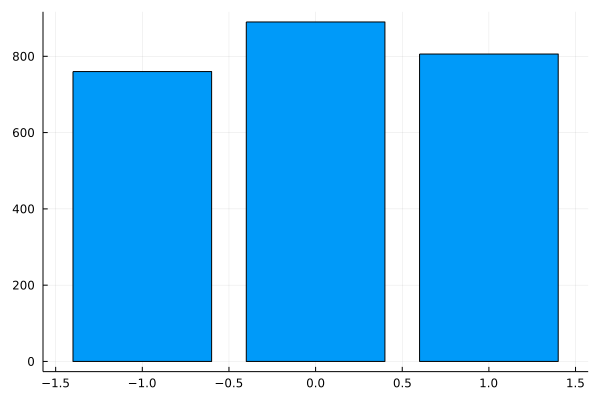

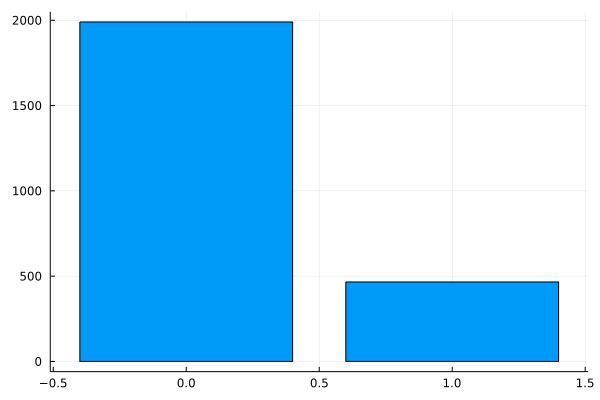

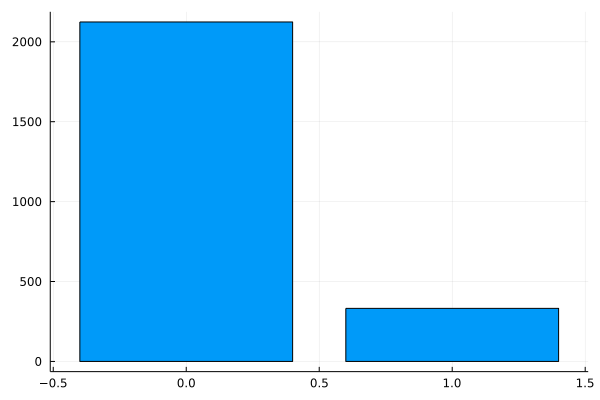

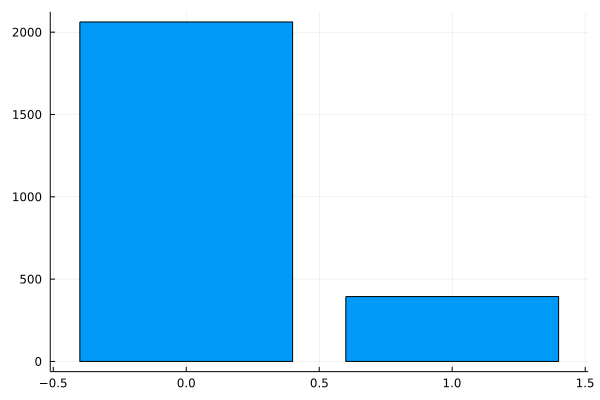

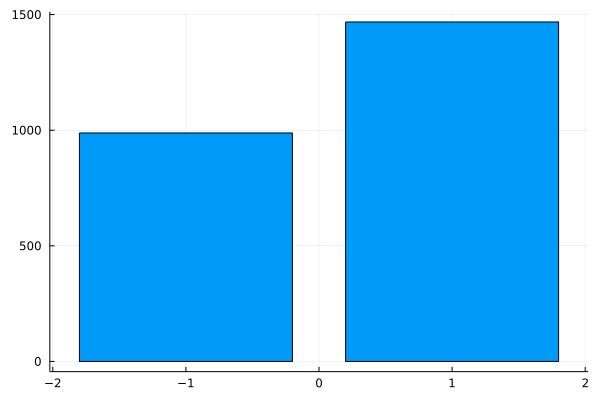

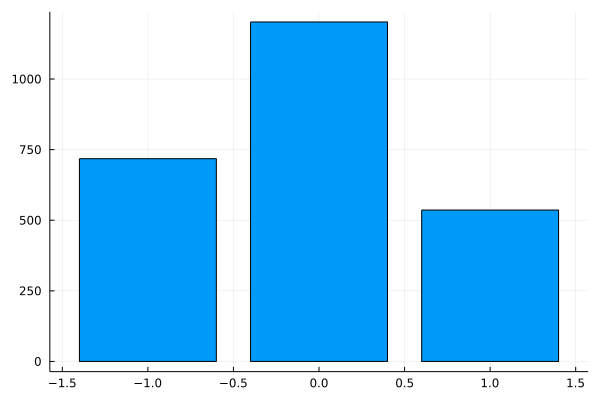

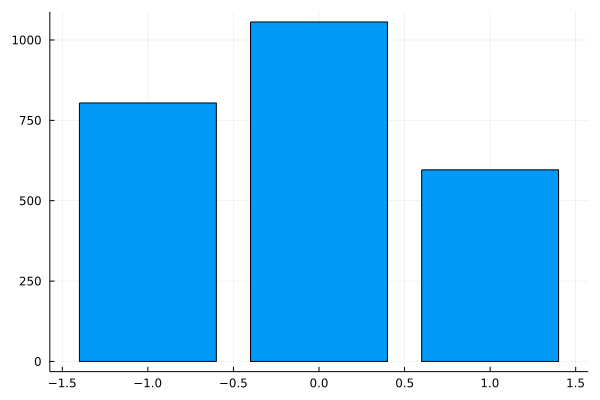

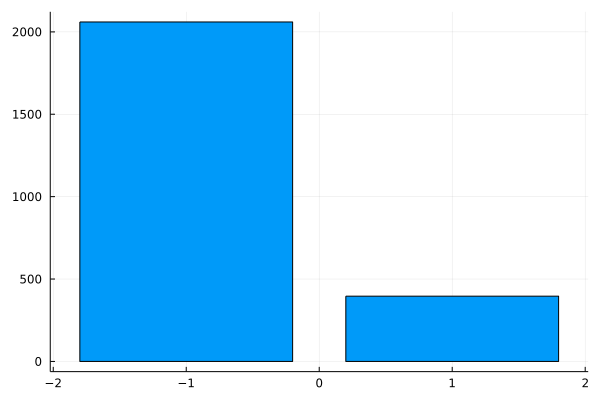

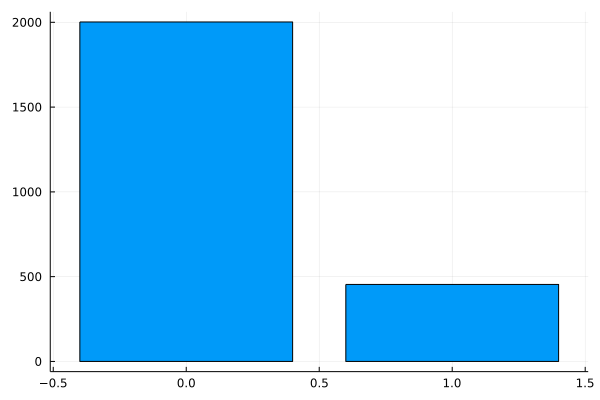

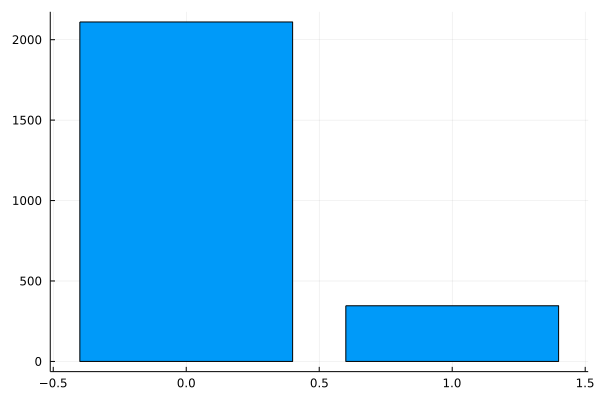

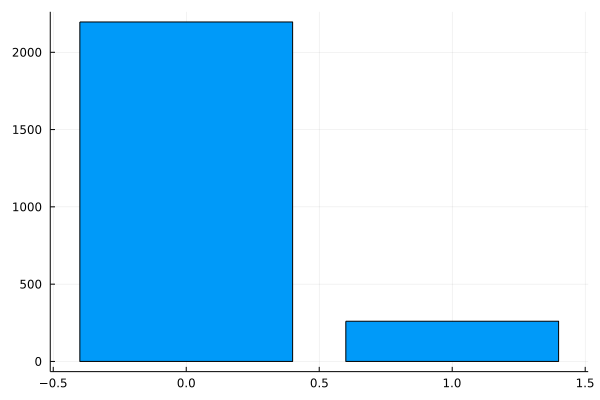

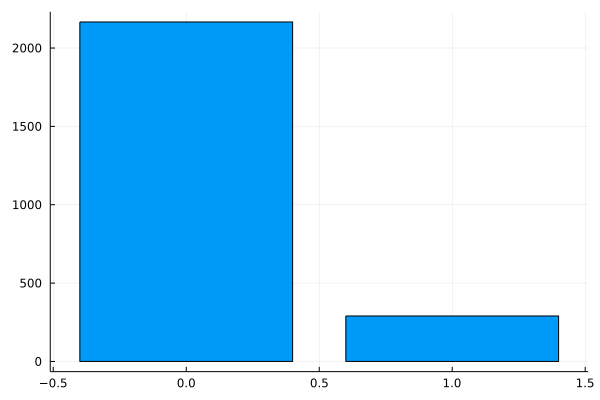

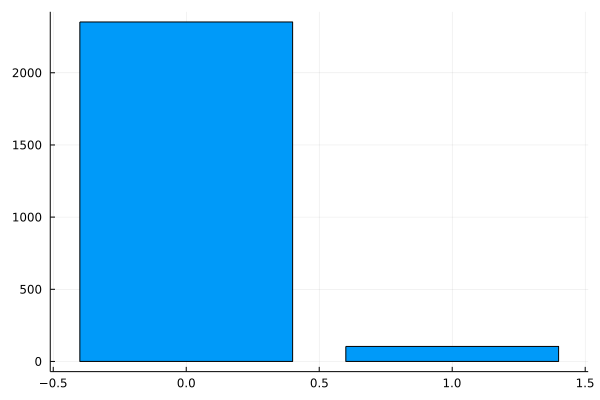

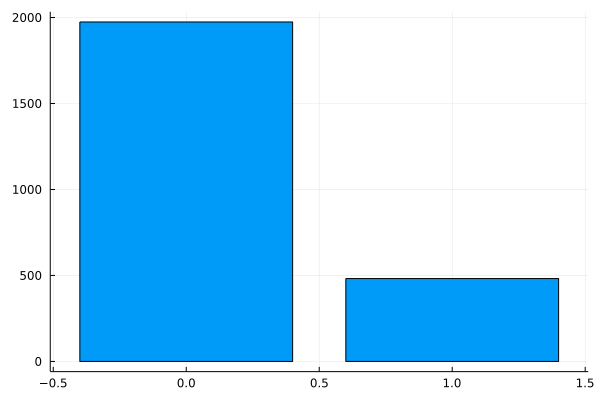

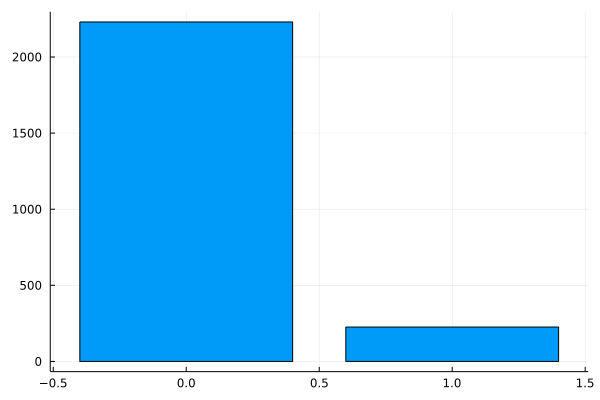

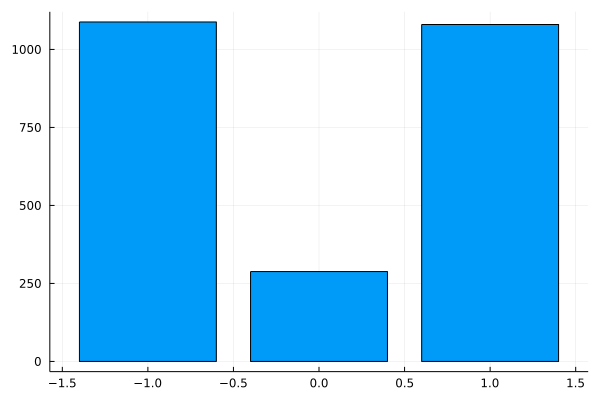

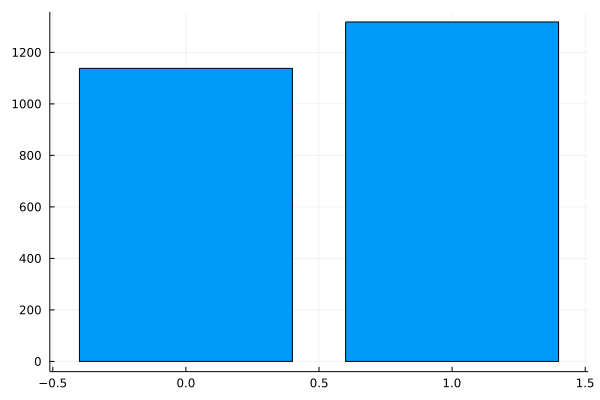

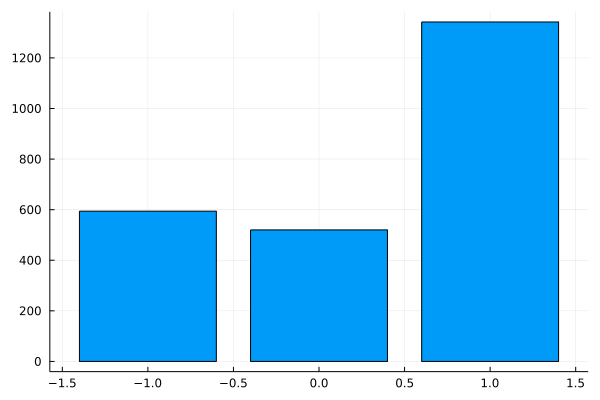

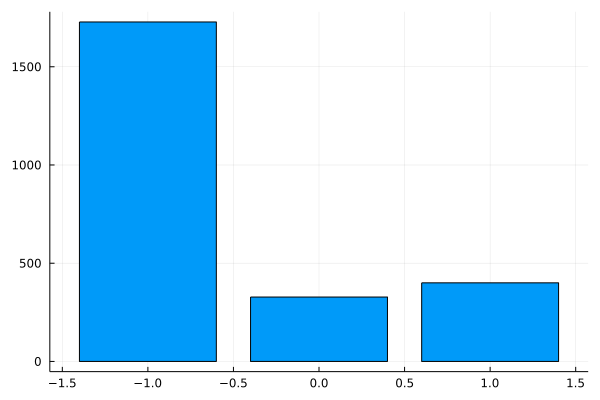

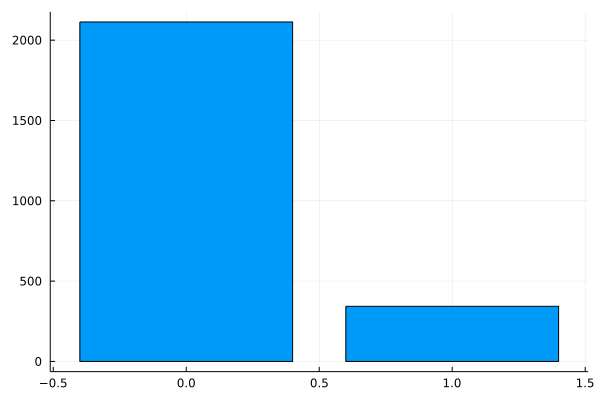

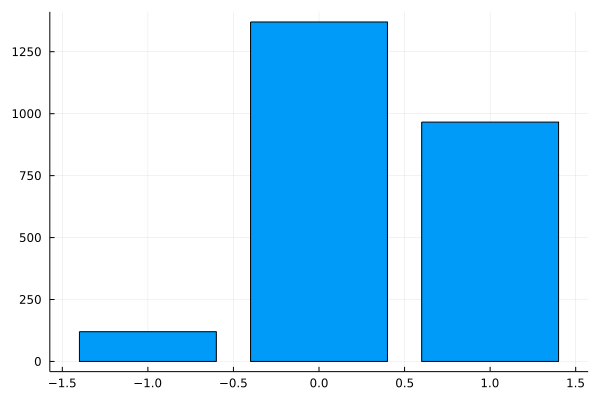

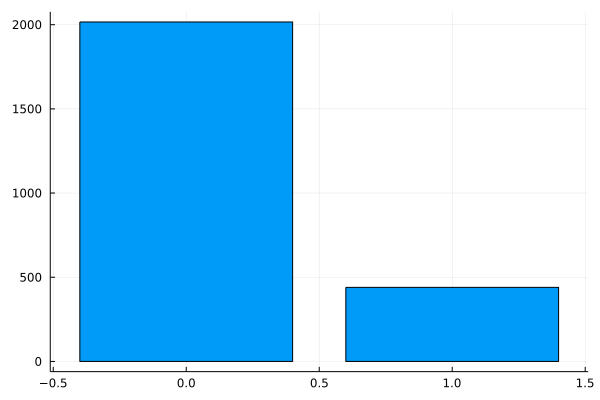

In [8]:

for i in 1:length(cols)-1
    tempdf = combine(groupby(dataf,cols[i]),nrow => cols[end])
    display(Plots.bar(tempdf[:,cols[i]],tempdf[:,cols[end]], legend = false))
end

## 2. Feature Engineering

### Checking if our data is unbalanced or not

Here, According to the **code** below and **Bar chart**, it is clear that our **"Result"** column, which is our output column, is **not unbalanced**. As it does not have drastic difference in Result column's labels (0 & 1).

In [9]:
counter(dataf[!,end])

Accumulator{Int64, Int64} with 2 entries:
  0 => 1362
  1 => 1094

### Handing Missing Value
* Here, there is no need to handle missing value because it does not have any missing value.

#### Feature Scaling & Transformation
* Here, There is no need to Scale or Transform Data because entire Data lies between -1 to 1.

In [10]:
X = dataf[!,cols[1:end-1]];
y = dataf[!,end];

In [11]:
first(X,10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting
,Int64,Int64,Int64,Int64,Int64
1,1,1,0,0,1
2,0,1,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,1,0,0
6,1,0,1,0,1
7,0,-1,0,0,0
8,0,-1,0,0,0
9,0,0,0,0,0


In [12]:
first(y,10)

10-element Vector{Int64}:
 1
 1
 1
 1
 0
 0
 0
 0
 0
 1

In [13]:
X_mat = Matrix(X);

## 3. Feature Selection

Using **"ExtraTreeClassifier"** for Feature Selection.

In [14]:
using PyCall
@pyimport sklearn
@pyimport sklearn.ensemble as sken
ExtraTreesClassifier = sken.ExtraTreesClassifier

PyObject <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>

In [15]:
model = ExtraTreesClassifier()
model.fit(X_mat,y)

PyObject ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.0026606318291644976, 0.0056388779799927385, 0.002375954760643726, 0.0017752956705188554, 0.00189553889814442, 0.10423080836874768, 0.047648441644884236, 0.269025911949077, 0.027137539705598374, 0.0043162204680021864, 0.003010780397120184, 0.00550579008112576, 0.02091848980005523, 0.19872433528465888, 0.030281403451873565, 0.004451141598983318, 0.004334288625340545, 0.0027074991902848603, 0.001981060735452762, 0.003624438908935366, 0.0017224019867600397, 0.006428061115565718, 0.0032632318694250486, 0.04087097011067475, 0.015743166442545524, 0.118106922967118, 0.04099528294909787, 0.011673685403780566, 0.01622012983152138, 0.0027316979749071072]

In [17]:
dataf3 = DataFrame(:index=>names(X),:feature_importances_=>model.feature_importances_ )


,index,feature_importances_
,String,Float64
1,having_IP_Address,0.00266063
2,URL_Length,0.00563888
3,Shortining_Service,0.00237595
4,having_At_Symbol,0.0017753
5,double_slash_redirecting,0.00189554
6,Prefix_Suffix,0.104231
7,having_Sub_Domain,0.0476484
8,SSLfinal_State,0.269026
9,Domain_registeration_length,0.0271375


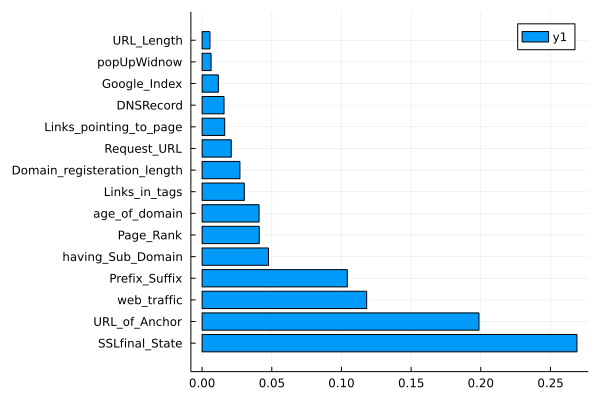

In [18]:
sort!(dataf3, [:feature_importances_])
dataftemp = dataf3[end-14:end,:]
y_label = dataftemp[!,:index];
Plots.bar(dataftemp[!,:feature_importances_],orientation=:h,yticks = (1:15,y_label),yflip=true)

Here Columns like **'Prefix_Suffix'**, **'web_traffic'**, **'URL_of_Anchor'** and **'SSLfinal_State'** are more important for our outcome. Hence, We are taking these 4 Columns.

In [19]:
X_sel = X[!,[:Prefix_Suffix,:web_traffic,:URL_of_Anchor,:SSLfinal_State]]
first(X_sel,5)

,Prefix_Suffix,web_traffic,URL_of_Anchor,SSLfinal_State
,Int64,Int64,Int64,Int64
1,-1,-1,-1,-1
2,-1,0,0,1
3,-1,1,0,-1
4,-1,1,0,-1
5,-1,0,0,1


## Model Selection & Creation

### 1. RandomForestClassifier:

In [20]:
@pyimport sklearn.model_selection as model_sel;
cross_val_score = model_sel.cross_val_score;

@pyimport sklearn.ensemble as sken;
RandomForestClassifier = sken.RandomForestClassifier;

In [21]:
RFC_classifier = RandomForestClassifier();

#### Applying Cross-Validation

In [22]:
using Statistics

In [23]:
X_sel_mat = Matrix(X_sel);
Accuracy = cross_val_score(RFC_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
RFC_classifier_Accuracy = mean(Accuracy)*100;
display(Accuracy);
println("\n AVG. Accuracy for RandomForestClassifier is: ",mean(Accuracy)*100)

10-element Vector{Float64}:
 0.9227642276422764
 0.926829268292683
 0.9186991869918699
 0.943089430894309
 0.9471544715447154
 0.9186991869918699
 0.9346938775510204
 0.963265306122449
 0.9591836734693877
 0.9306122448979591


 AVG. Accuracy for RandomForestClassifier is: 93.64990874398542


In [24]:
#from sklearn.model_selection import train_test_split
@pyimport sklearn.model_selection as skmn
train_test_split = skmn.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel_mat, y, test_size=0.25, random_state=42)

4-element Vector{Array{Int64}}:
 [0 1 0 1; 0 0 -1 -1; … ; -1 0 1 1; -1 -1 -1 -1]
 [0 1 1 1; 0 0 0 1; … ; 0 1 1 1; -1 1 0 -1]
 [0, 1, 1, 0, 1, 1, 1, 1, 1, 1  …  0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 1, 1, 0, 1, 1, 0, 0, 0, 1]

In [25]:
# Fitting the Model
RFC_classifier.fit(X_train,y_train)

# Predicting from X_test
y_pred = RFC_classifier.predict(X_test);


In [26]:
# Calculating Confusion Matrix
#from sklearn.metrics import confusion_matrix
@pyimport sklearn.metrics as skme
confusion_matrix = skme.confusion_matrix

PyObject <function confusion_matrix at 0x0000000096E3F550>

In [27]:
cm = confusion_matrix(y_test, y_pred)
display(cm)
accuracy_score = skme.accuracy_score
score = accuracy_score(y_pred,y_test)
RFC_classifier_accuracy  = score
display(score)


2×2 Matrix{Int64}:
 326   21
  13  254

0.9446254071661238

### 2.Decision Tree

In [28]:
@pyimport sklearn as skle
DEC_classifier = skle.tree.DecisionTreeClassifier()

PyObject DecisionTreeClassifier()

In [29]:
Accuracy = cross_val_score(DEC_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
Accuracy = mean(Accuracy)*100
DEC_classifier_Accuracy  = Accuracy;
print("\n AVG. Accuracy for DecisionTree is: ",Accuracy)


 AVG. Accuracy for DecisionTree is: 93.64990874398542

### 3.KNN

In [30]:
@pyimport sklearn.neighbors as skne
KNeighborsClassifier = skne.KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()

PyObject KNeighborsClassifier()

#### Applying Cross-Validation

In [31]:
Accuracy = cross_val_score(KNN_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
print(Accuracy)
KNN_classifier_Accuracy = mean(Accuracy)*100;
print("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9146341463414634, 0.9227642276422764, 0.9146341463414634, 0.9308943089430894, 0.9471544715447154, 0.9186991869918699, 0.9224489795918367, 0.9346938775510204, 0.9591836734693877, 0.9224489795918367]
 AVG. Accuracy for KNN is: 92.87555998008958

In [32]:
# Model
KNN_classifier.fit(X_train,y_train);
y_pred = KNN_classifier.predict(X_test);

# Calculating Confusion Matrix
@pyimport sklearn.metrics as skme
cm = skme.confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=skme.accuracy_score(y_pred,y_test)
println(score)


[328 19; 32 235]
0.9169381107491856


### 4. SVM:

In [33]:
@pyimport sklearn as sk
svm = sk.svm;
SVC_classifier = svm.SVC()

PyObject SVC()

#### Applying Cross-Validation

In [34]:
Accuracy = cross_val_score(SVC_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
print(Accuracy)
SVC_classifier_Accuracy = mean(Accuracy)*100;
print("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9227642276422764, 0.926829268292683, 0.9146341463414634, 0.943089430894309, 0.9471544715447154, 0.9186991869918699, 0.9306122448979591, 0.963265306122449, 0.9591836734693877, 0.9306122448979591]
 AVG. Accuracy for KNN is: 93.56844201095072

In [35]:
# Model
SVC_classifier.fit(X_train,y_train)
y_pred = SVC_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
println(cm)
score=accuracy_score(y_pred,y_test)
println(score)

[314 33; 10 257]
0.9299674267100977


### 5. LogisticRegression:

In [36]:
@pyimport sklearn.linear_model as skln
LR_classifier = skln.LogisticRegression()

PyObject LogisticRegression()

#### Applying Cross-Validation

In [37]:
Accuracy = cross_val_score(LR_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
println(Accuracy)
LR_classifier_Accuarcy = mean(Accuracy)*100;
println("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9186991869918699, 0.926829268292683, 0.9146341463414634, 0.9349593495934959, 0.943089430894309, 0.9186991869918699, 0.9346938775510204, 0.9510204081632653, 0.9551020408163265, 0.926530612244898]

 AVG. Accuracy for KNN is: 93.24257507881202


In [38]:
# Model
LR_classifier.fit(X_train,y_train)
y_pred = LR_classifier.predict(X_test)

# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=accuracy_score(y_pred,y_test)
println(score)


[325 22; 14 253]
0.9413680781758957


### 6. Naive Bayes:

In [39]:
@pyimport sklearn.naive_bayes as sknb

NB_classifier = sknb.GaussianNB();

#### Applying Cross-Validation

In [40]:
Accuracy = cross_val_score(LR_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
println(Accuracy)
NB_classifier_Accuracy = mean(Accuracy)*100;
println("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9186991869918699, 0.926829268292683, 0.9146341463414634, 0.9349593495934959, 0.943089430894309, 0.9186991869918699, 0.9346938775510204, 0.9510204081632653, 0.9551020408163265, 0.926530612244898]

 AVG. Accuracy for KNN is: 93.24257507881202


In [41]:
# Model
NB_classifier.fit(X_train,y_train)
y_pred = NB_classifier.predict(X_test)


# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=accuracy_score(y_pred,y_test)
println(score)

[326 21; 32 235]
0.9136807817589576


### 7. ANN

In [42]:
@pyimport keras as ke
@pyimport keras.models as kemo
Sequential = kemo.Sequential
@pyimport keras.layers as kela
Dense = kela.Dense
LeakyReLU = kela.LeakyReLU
PReLU = kela.LeakyReLU
ELU = kela.ELU
Dropout = kela.Dropout;


In [43]:
# Initialising the ANN
ANN_classifier = Sequential()
# Adding the input layer and the first hidden layer
# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
ANN_classifier.add(Dense( 12, kernel_initializer = "he_uniform",activation="relu",input_dim = 4))
ANN_classifier.add(Dropout(0.4))

# Adding the second hidden layer
ANN_classifier.add(Dense( 8, kernel_initializer = "he_uniform",activation="relu"))
ANN_classifier.add(Dropout(0.5))

#Adding Third Layer
ANN_classifier.add(Dense( 3, kernel_initializer = "he_uniform",activation="relu"))
ANN_classifier.add(Dropout(0.2))

# Adding the output layer
ANN_classifier.add(Dense( 1, kernel_initializer =  "he_uniform", activation = "sigmoid"))

# Compiling the ANN
ANN_classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Fitting the ANN to the Training set
model_history=ANN_classifier.fit(X_train, y_train,verbose = 2,validation_split=0.30,batch_size = 30, workers = 8,use_multiprocessing=true, epochs = 150)

Epoch 1/150
43/43 - 2s - loss: 1.1526 - accuracy: 0.5081 - val_loss: 0.8206 - val_accuracy: 0.5389 - 2s/epoch - 39ms/step
Epoch 2/150
43/43 - 0s - loss: 0.8618 - accuracy: 0.5508 - val_loss: 0.6446 - val_accuracy: 0.5986 - 264ms/epoch - 6ms/step
Epoch 3/150
43/43 - 0s - loss: 0.7513 - accuracy: 0.5524 - val_loss: 0.5595 - val_accuracy: 0.6329 - 273ms/epoch - 6ms/step
Epoch 4/150
43/43 - 0s - loss: 0.6822 - accuracy: 0.5710 - val_loss: 0.5063 - val_accuracy: 0.7631 - 268ms/epoch - 6ms/step
Epoch 5/150
43/43 - 0s - loss: 0.6248 - accuracy: 0.6206 - val_loss: 0.4694 - val_accuracy: 0.8861 - 265ms/epoch - 6ms/step
Epoch 6/150
43/43 - 0s - loss: 0.6103 - accuracy: 0.6253 - val_loss: 0.4490 - val_accuracy: 0.8951 - 268ms/epoch - 6ms/step
Epoch 7/150
43/43 - 0s - loss: 0.5829 - accuracy: 0.6354 - val_loss: 0.4373 - val_accuracy: 0.9024 - 266ms/epoch - 6ms/step
Epoch 8/150
43/43 - 0s - loss: 0.5618 - accuracy: 0.6843 - val_loss: 0.4226 - val_accuracy: 0.9096 - 309ms/epoch - 7ms/step
Epoch 9/15

2022-08-20 17:30:11.895143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-20 17:30:12.382366: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3967 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


PyObject <keras.callbacks.History object at 0x0000000097361D00>

In [44]:
model_history.history

Dict{Any, Any} with 4 entries:
  "val_accuracy" => [0.538879, 0.598553, 0.632911, 0.76311, 0.886076, 0.895118,…
  "accuracy"     => [0.508146, 0.550815, 0.552366, 0.570985, 0.620636, 0.625291…
  "loss"         => [1.15265, 0.861784, 0.751256, 0.682216, 0.624844, 0.610339,…
  "val_loss"     => [0.820636, 0.644597, 0.559523, 0.506309, 0.469442, 0.449028…

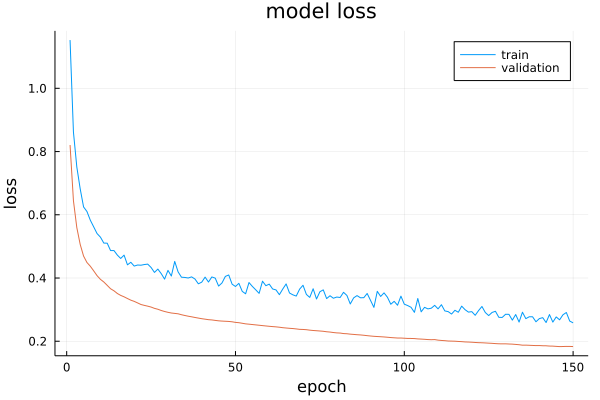

In [45]:

plot([model_history.history["loss"],model_history.history["val_loss"]],title = "model loss",
xlabel = "epoch",ylabel = "loss",label =  ["train" "validation"],loc="upper left"
)

In [46]:
y_pred = ANN_classifier.predict(X_test);
y_pred = (y_pred.> 0.5);



20/20 [==============================] - 0s 2ms/step


In [47]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=accuracy_score(y_pred,y_test)
println(score)
ANN_accuaracy = score;

[314 33; 10 257]
0.9299674267100977


In [48]:
Accuracy = 
[RFC_classifier_Accuracy,DEC_classifier_Accuracy,ANN_accuaracy, KNN_classifier_Accuracy,
SVC_classifier_Accuracy,NB_classifier_Accuracy,LR_classifier_Accuarcy];
Names = 
["RandomForestClassifier", "Decision Tree", "ANN", "KNN","SVM","Naive Bayes","Logistic Regression"]
df = DataFrame(; Algorithms=Names, Accuracy=Accuracy)

,Algorithms,Accuracy
,String,Float64
1,RandomForestClassifier,93.6499
2,Decision Tree,93.6499
3,ANN,0.929967
4,KNN,92.8756
5,SVM,93.5684
6,Naive Bayes,93.2426
7,Logistic Regression,93.2426
